In [1]:
from datasets.get_datasets import *
import time
from src.genetic import *

from src.predicate import *
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
bk = {
      'imdb': ['workedunder(+person,+person).',
              'workedunder(+person,-person).',
              'workedunder(-person,+person).',
              'female(+person).',
              'actor(+person).',
              'director(+person).',
              'movie(+movie,+person).',
              'movie(+movie,-person).',
              'movie(-movie,+person).',
              'genre(+person,+genre).'],
      'uwcse': ['professor(+person).',
        'student(+person).',
        'advisedby(+person,+person).',
        'advisedby(+person,-person).',
        'advisedby(-person,+person).',
        'tempadvisedby(+person,+person).',
        'tempadvisedby(+person,-person).',
        'tempadvisedby(-person,+person).',
        'ta(+course,+person,+quarter).',
        'ta(-course,-person,+quarter).',
        'ta(+course,-person,-quarter).',
        'ta(-course,+person,-quarter).',
        'hasposition(+person,+faculty).',
        'hasposition(+person,-faculty).',
        'hasposition(-person,+faculty).',
        'publication(+title,+person).',
        'publication(+title,-person).',
        'publication(-title,+person).',
        'inphase(+person,+prequals).',
        'inphase(+person,-prequals).',
        'inphase(-person,+prequals).',
        'courselevel(+course,+level).',
        'courselevel(+course,-level).',
        'courselevel(-course,+level).',
        'yearsinprogram(+person,+year).',
        'yearsinprogram(-person,+year).',
        'yearsinprogram(+person,-year).',
        'projectmember(+project,+person).',
        'projectmember(+project,-person).',
        'projectmember(-project,+person).',
        'sameproject(+project,+project).',
        'sameproject(+project,-project).',
        'sameproject(-project,+project).',
        'samecourse(+course,+course).',
        'samecourse(+course,-course).',
        'samecourse(-course,+course).',
        'sameperson(+person,+person).',
        'sameperson(+person,-person).',
        'sameperson(-person,+person).',],
      'cora': ['sameauthor(+author,+author).',
              'sameauthor(+author,-author).',
              'sameauthor(-author,+author).',
              'samebib(+class,+class).',
              'samebib(+class,-class).',
              'samebib(-class,+class).',
              'sametitle(+title,+title).',
              'sametitle(+title,-title).',
              'sametitle(-title,+title).',
              'samevenue(+venue,+venue).',
              'samevenue(+venue,-venue).',
              'samevenue(-venue,+venue).',
              'author(+class,+author).',
              'author(+class,-author).',
              'author(-class,+author).',
              'title(+class,+title).',
              'title(+class,-title).',
              'title(-class,+title).',
              'venue(+class,+venue).',
              'venue(+class,-venue).',
              'venue(-class,+venue).',
              'haswordauthor(+author,+word).',
              'haswordauthor(+author,-word).',
              'haswordauthor(-author,+word).',
              'haswordtitle(+title,+word).',
              'haswordtitle(+title,-word).',
              'haswordtitle(-title,+word).',
              'haswordvenue(+venue,+word).',
              'haswordvenue(+venue,-word).',
              'haswordvenue(-venue,+word).'],
      'webkb': ['coursepage(+page).',
                'facultypage(+page).',
                'studentpage(+page).',
                'researchprojectpage(+page).',
                'linkto(+id,+page,+page).',
                'linkto(+id,-page,-page).',
                'linkto(-id,-page,+page).',
                'linkto(-id,+page,-page).',
                'has(+word,+page).',
                'has(+word,-page).',
                'has(-word,+page).',
                'hasalphanumericword(+id).',
                'allwordscapitalized(+id).',
                'instructorsof(+page,+page).',
                'instructorsof(+page,-page).',
                'instructorsof(-page,+page).',
                'hasanchor(+word,+page).',
                'hasanchor(+word,-page).',
                'hasanchor(-word,+page).',
                'membersofproject(+page,+page).',
                'membersofproject(+page,-page).',
                'membersofproject(-page,+page).',
                'departmentof(+page,+page).',
                'departmentof(+page,-page).',
                'departmentof(-page,+page).',
                'pageclass(+page,+class).',
                'pageclass(+page,-class).',
                'pageclass(-page,+class).'],
      'twitter': ['accounttype(+account,+type).',
                  'accounttype(+account,-type).',
                  'accounttype(-account,+type).',
                  'tweets(+account,+word).',
                  'tweets(+account,-word).',
                  'tweets(-account,+word).',
                  'follows(+account,+account).',
                  'follows(+account,-account).',
                  'follows(-account,+account).',],
      'yeast': ['location(+protein,+loc).',
                'location(+protein,-loc).',
                'location(-protein,+loc).',
                'interaction(+protein,+protein).',
                'interaction(+protein,-protein).',
                'interaction(-protein,+protein).',
                'proteinclass(+protein,+class).',
                'proteinclass(+protein,-class).',
                'proteinclass(-protein,+class).',
                'enzyme(+protein,+enz).',
                'enzyme(+protein,-enz).',
                'enzyme(-protein,+enz).',
                'function(+protein,+fun).',
                'function(+protein,-fun).',
                'function(-protein,+fun).',
                'complex(+protein,+com).',
                'complex(+protein,-com).',
                'complex(-protein,+com).',
                'phenotype(+protein,+phe).',
                'phenotype(+protein,-phe).',
                'phenotype(-protein,+phe).'],
      'nell_sports': ['athleteledsportsteam(+athlete,+sportsteam).',
              'athleteledsportsteam(+athlete,-sportsteam).',
              'athleteledsportsteam(-athlete,+sportsteam).',
              'athleteplaysforteam(+athlete,+sportsteam).',
              'athleteplaysforteam(+athlete,-sportsteam).',
              'athleteplaysforteam(-athlete,+sportsteam).',
              'athleteplaysinleague(+athlete,+sportsleague).',
              'athleteplaysinleague(+athlete,-sportsleague).',
              'athleteplaysinleague(-athlete,+sportsleague).',
              'athleteplayssport(+athlete,+sport).',
              'athleteplayssport(+athlete,-sport).',
              'athleteplayssport(-athlete,+sport).',
              'teamalsoknownas(+sportsteam,+sportsteam).',
              'teamalsoknownas(+sportsteam,-sportsteam).',
              'teamalsoknownas(-sportsteam,+sportsteam).',
              'teamplaysagainstteam(+sportsteam,+sportsteam).',
              'teamplaysagainstteam(+sportsteam,-sportsteam).',
              'teamplaysagainstteam(-sportsteam,+sportsteam).',
              'teamplaysinleague(+sportsteam,+sportsleague).',
              'teamplaysinleague(+sportsteam,-sportsleague).',
              'teamplaysinleague(-sportsteam,+sportsleague).',
              'teamplayssport(+sportsteam,+sport).',
              'teamplayssport(+sportsteam,-sport).',
              'teamplayssport(-sportsteam,+sport).'],
      'nell_finances': ['countryhascompanyoffice(+country,+company).',
                        'countryhascompanyoffice(+country,-company).',
                        'countryhascompanyoffice(-country,+company).',
                        'companyeconomicsector(+company,+sector).',
                        'companyeconomicsector(+company,-sector).',
                        'companyeconomicsector(-company,+sector).',
                        'economicsectorcompany(+sector,-company).',
                        'economicsectorcompany(-sector,+company).',
                        'companyceo(+company,+person).',
                        'companyceo(+company,-person).',
                        'companyceo(-company,+person).',
                        'companyalsoknownas(+company,+company).',
                        'companyalsoknownas(+company,-company).',
                        'companyalsoknownas(-company,+company).',
                        'cityhascompanyoffice(+city,+company).',
                        'cityhascompanyoffice(+city,-company).',
                        'cityhascompanyoffice(-city,+company).',
                        'acquired(+company,+company).',
                        'acquired(+company,-company).',
                        'acquired(-company,+company).',
                        'bankbankincountry(+person,+country).',
                        'bankbankincountry(+person,-country).',
                        'bankbankincountry(-person,+country).',
                        'bankboughtbank(+company,+company).',
                        'bankboughtbank(+company,-company).',
                        'bankboughtbank(-company,+company).',
                        'bankchiefexecutiveceo(+company,+person).',
                        'bankchiefexecutiveceo(+company,-person).',
                        'bankchiefexecutiveceo(-company,+person).']}


# Testing transfer between IMDB and UW-CSE using groot

In [3]:
bk_source = bk['imdb']
bk_target = bk['uwcse']

In [4]:
imdb_dataset = datasets.load('imdb', bk_source, target='workedunder', seed=441773) #facts, pos, neg
uwcse_dataset = datasets.load('uwcse', bk_target, target='advisedby', seed=441773) #facts, pos, neg

In [5]:
train_facts_source = []
train_pos_source = []
train_neg_source = []
for i in range(0, len(imdb_dataset)):
    train_facts_source.extend(imdb_dataset[0][i])
    train_pos_source.extend(imdb_dataset[1][i])
    train_neg_source.extend(imdb_dataset[2][i])

In [6]:
target = ['workedunder']

background_knowledge_src = boostsrl.modes(bk_source, target, useStdLogicVariables=False, 
                                          maxTreeDepth=3, nodeSize=2, numOfClauses=8)

model_src = boostsrl.train(background_knowledge_src, train_pos_source, train_neg_source, train_facts_source, trees=10)

In [7]:
structured_src = []
for i in range(0, 10):
    try:
        structured_src.append(model_src.get_structured_tree(treenumber=i+1).copy())
    except:
        structured_src.append(model_src.get_structured_tree(treenumber='combine').copy())

In [8]:
#pred_target é : pred_target = [('movie', '+,-'), ('director', '+'),...]
import re
pred_target = []
for pred in bk_target:
    modes = ','.join([pred[occur.start()] for occur in re.finditer('[+\-]', pred)])
    pred_target.append((pred.split('(')[0], modes))

In [9]:
def get_branch(curr_value, next_value):
    if curr_value == '': 
        return next_value
    return '{},{}'.format(curr_value, next_value)

def define_individual(structured_tree, tree_number):
    individual_tree = []
    target = structured_tree[0]
    nodes = structured_tree[1]
    for values, node in nodes.items():
        if values == '': 
            branch = '{} :- {}.'.format(target, node)
        else: branch = '{}.'.format(node)
        left_branch = 'true' if get_branch(values, 'true') in nodes  else 'false'
        right_branch = 'true' if get_branch(values, 'false') in nodes else 'false'
        individual_tree.append('{};{};{};{};{}'.format(tree_number, values, 
                                                  branch, left_branch, right_branch))
    return individual_tree

src_struct = copy.deepcopy(structured_src)
new_src_struct = []
for i in range(0, len(src_struct)):
    new_src_struct.append(define_individual(src_struct[i], i))


### Starting the transfer between source and target

In [10]:
train_facts = uwcse_dataset[0][1:]
train_pos = uwcse_dataset[1][1:]
train_neg = uwcse_dataset[2][1:]

test_facts = uwcse_dataset[0][0]
test_pos = uwcse_dataset[1][0]
test_neg = uwcse_dataset[2][0]

In [11]:
start = time.time()
pred = Predicate(bk_source, bk_target, pred_target)
results = genetic(new_src_struct, 'advisedby', 'workedunder', pred, train_pos, 
                        train_neg, train_facts,
                        NUM_GEN=15, pop_size=30)
print("FIM: ", time.time()-start)

/usr/local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.30250725
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0036109240074390925
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.28818
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0036425025051466924
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.33284375
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0030503639434500164
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
---------------

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.27712275
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005616806805249765
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.34686049999999996
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0033370317274488115
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.312611
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0019623353434110083
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
------

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.3451725
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.004970974024273307
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.3451725
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.004970974024273307
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.3451725
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.004970974024273307
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
------------------

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.36051075
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0039098252118860855
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.36051075
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0039098252118860855
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.36051075
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0039098252118860855
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
------------

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.33386899999999997
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.004432031193482295
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.3297335
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0030524004078757256
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.32667775
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.004775490936804284
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
------

MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.36193075
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.0058782251307260966
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
(0.27923275,) False
(0.27923275,) False
(0.36429700000000004,) False
(0.3387245,) False
(0.33386899999999997,) False
(0.3297335,) False
(0.32667775,) False
(0.32667775,) False
(0.32667775,) False
(0.32667775,) False
(0.32667775,) False
(0.32667775,) False
(0.32667775,) False
(0.32667775,) False
(0.37974074999999996,) False
(0.37974074999999996,) False
(0.37974074999999996,) False
(0.37974074999999996,) False
(0.37974074999999996,) False
(0.37974074999999996,) False
(0.37974074999999996,) False
(0.37974074999999996,) False
(0.34086325,) False
(0.337521,) False
(0.337521,) False
(0.337521,) False
(0.337521,) False
(0.337521,) False
(0.36193075,) False
(0.2616755,) True
bestRes

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.34242074999999994
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005095264192119972
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.34242074999999994
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005095264192119972
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.34242074999999994
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005095264192119972
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.00362777

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.29400974999999996
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005873616321100658
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.29400974999999996
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005873616321100658
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.29400974999999996
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005873616321100658
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.00362777

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.31706875
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.006555216715525126
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.31706875
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.006555216715525126
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.31706875
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.006555216715525126
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
---------------

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.312954
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005600531358719455
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.312954
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005600531358719455
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.312954
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005600531358719455
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
M

MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.39010825
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.0038494032897970105
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.39010825
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.0038494032897970105
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.32998125
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.005671301101819578
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  

MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.31364375
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.0053360015168194865
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.31364375
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.0053360015168194865
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.31364375
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.0053360015168194865
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL: 

MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.336498
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.010709582928387074
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.30781775
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.006672097360463195
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.30269475
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.0051060489801313174
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.272795
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005612499844097985
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.272795
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005612499844097985
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.272795
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005612499844097985
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
M

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.27663225
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.00438125315263795
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.27096675000000003
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0060098909879880485
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.31521625
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.004853820009796394
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
------

MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.35421674999999997
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.0039874277031063405
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.3562955
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.008531630046479974
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.37881224999999996
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005236186511909223
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.3339085
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005362104694054393
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.3339085
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005362104694054393
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.3339085
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005362104694054393
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
------------------

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.31592075
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005686506457175618
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.31592075
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005686506457175618
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.31592075
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005686506457175618
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
---------------

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.2955415
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0038098898606127763
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.29109675
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.00610068563257443
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.29109675
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.00610068563257443
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-----------------

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.25125425
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.004782386087247658
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.2472935
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.006847917950004953
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.2472935
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.006847917950004953
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-----------------

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.338374
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.004594123365779364
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.42148225
PREC:  0.64557525
RECALL:  1.0
F1:  0.8799205
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.007344100978846889
PREC:  0.16178686394122826
RECALL:  0.0
F1:  0.06241446728323489
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.41598225
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.006533527162834775
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CL

### Testing the best individual

In [25]:
ind = results[0].population[1]
refine = []
for tree in ind.modified_src_tree:
    refine.extend(tree)
    
transfer = ind.transfer.transfer

In [26]:
background_train = boostsrl.modes(bk_target, ['advisedby'], useStdLogicVariables=False, 
                                          maxTreeDepth=3, nodeSize=2, numOfClauses=8)


In [27]:
tr_train_pos = []
tr_train_neg = []
tr_train_facts = []

for i in range(0, len(train_pos)):
    tr_train_pos.extend(train_pos[i])
    tr_train_neg.extend(train_neg[i])
    tr_train_facts.extend(train_facts[i])

model_tr = boostsrl.train(background_train, tr_train_pos, tr_train_neg, 
                                      tr_train_facts, refine=refine, transfer=transfer,
                                      trees=10)

In [28]:
test_model = boostsrl.test(model_tr, test_pos, test_neg, 
                                       test_facts, trees=10)
test_model.summarize_results()

{'AUC ROC': 0.942857,
 'AUC PR': 0.897436,
 'CLL': -0.405942,
 'Precision': [0.897436, 0.5],
 'Recall': 1.0,
 'F1': 0.945946}

### Verifying results

In [47]:
f_results = test_model.inference_results('advisedby')

In [54]:
y_pred = []
y_true = []

for key, value in f_results.items():
    if '!' in key:
        y_true.append(0)
        y_pred.append(0) if value > 0.5 else y_pred.append(1)
    else:
        y_true.append(1)
        y_pred.append(1) if value > 0.5 else y_pred.append(0)

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#tn, fp, fn, tp
cm = confusion_matrix(y_true, y_pred)
list_cm = cm.ravel()

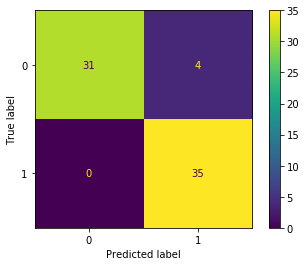

In [68]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 

In [66]:
cm

array([31,  4,  0, 35])

In [71]:
from sklearn.metrics import average_precision_score, roc_auc_score

average_precision_score(y_true, y_pred)

0.8974358974358975

In [72]:
roc_auc_score(y_true, y_pred)

0.9428571428571428